In [1]:
# Teen Titans Clustering.

# All rights are reserved to Jason Lu 2021. No code may be used without express consent of 
# Jason Lu (jasonlu968@gmail.com).

# Teen Titans Clustering Coding Solutions

## All code, solutions, and methods are reserved for Jason Lu, 2021. Express usage of coding is forbidden outside of NC-SA Creative Commons licensing. 

Slide Decks Used From Episode 7 For Coding Solution Basis: 

https://docs.google.com/presentation/d/1zyqfl-ZOjbBAjgZYrZv-yBvlTF-eajS__QP0ODrPWG4/edit#slide=id.p

# Stable Matching Mentorship  

Stable Matching is an algorithm that determines compatible matches between two sets. 

For example (not necessarily dating / marriage related):

Mentors and Mentees 

Each new hire will be assigned a mentor

The mentor’s job is to properly onboard that new mentee / new hire 

So, how do we solve this problem? 

Gale Shapley algorithm is the answer. 

#### Gale Shapley Algorithm: 

Gale Shapley Algorithm: 

For each n mentors and m mentees (n <= m): we split the ‘relationships’ into rounds: 

For each round: the mentor or mentee can do the following:

Accept the ‘onboarding’ relationship

Reject the ‘onboarding’ relationship 

Defer for the next available mentorship or mentee-ship 

If the mentor-mentee or any pairing has not yet already been taken (we are assuming unique people in the mentors and mentees, no twins), then we will repeat until each pairing has been taken 

The results will properly onboard each mentee to a mentor 

Caveat: this assumes that neither n or m is not 2 more or less within each other


In [7]:
# Coding solution for Gale Shapley Algorithm.

# Source: https://gist.github.com/subpath/fac948b8fa18d0e5a539348231d14915

# Imports 

import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

# Solution code (with various portions commented)

# Four mentors and mentees to make it easy to illustrate. 
mentee_list = ["Mentee1","Mentee2","Mentee3","Mentee4"]
mentor_list = ["Mentor1","Mentor2","Mentor3","Mentor4"]

# Convert to dataframes. 
mentor_list_df = pd.DataFrame({'Mentor1': [3,4,2,1], 'Mentor2': [3,1,4,2], 'Mentor3': [2,3,4,1], 'Mentor4': [3,2,1,4]})
mentor_list_df.index = mentee_list

mentee_list_df = pd.DataFrame({'Mentor1': [1,1,2,4], 'Mentor2': [2,4,1,2], 'Mentor3': [3,3,3,3], 'Mentor4': [4,2,4,1]})
mentee_list_df.index = mentee_list

In [8]:
# Check both dataframes. 
mentor_list_df

,Mentor1,Mentor2,Mentor3,Mentor4
Mentee1,3,3,2,3
Mentee2,4,1,3,2
Mentee3,2,4,4,1
Mentee4,1,2,1,4


In [9]:
mentee_list_df

,Mentor1,Mentor2,Mentor3,Mentor4
Mentee1,1,2,3,4
Mentee2,1,4,3,2
Mentee3,2,1,3,4
Mentee4,4,2,3,1


#### Warning: 

This code may take a while (given it is a cubic algorithm), be patient. One improvement would be memoize it in a table, but doing dynamic programming with Stable Matching is overkill. 

In [10]:
# Encapsulate the Gale-Shapley Algorithm into a function here. 

def gale_shapley():
    # Custom Gale Shapley Algorithm, using various rounds. 
    # List of mentorships. 
    mentor_available = {mentee:mentor_list for mentee in mentee_list}
    # Deferrals between any one mentee or mentor. 
    deferrals = []
    # dict to store groups of mentors and mentees
    groups = {}
    # number of groups of mentors and mentees 
    count = 0
    while len(deferrals)<len(mentee_list):
        for mentee in mentee_list:
            if mentee not in deferrals:
                mentor = mentor_available[mentee]
                # Use df.loc Python function for call by value indexing here.
                best_choice = mentee_list_df.loc[mentee][mentee_list_df.loc[mentee].index.isin(mentor)].idxmin()
                # Mentor-mentee groups formed here. 
                groups[(mentee, best_choice)]=(mentee_list_df.loc[mentee][best_choice],
                                                 mentor_list_df.loc[mentee][best_choice])
        # Overlays for mentors and mentees. 
        overlays = Counter([key[1] for key in groups.keys()])
        # Iteratively choose best available mentor. 
        for mentor in overlays.keys():
            if overlays[mentor]>1:
                # pairs to drop from groups
                pairs_to_drop = sorted({pair: groups[pair] for pair in groups.keys() 
                    # Important: this prevents duplicates or twin mentors and mentees. 
                    if mentor in pair}.items(), key=lambda x:
                                       x[1][1])[1:]
                # Avoid double-asking between mentors and mentees. 
                for m_to_drop in pairs_to_drop:
                    del groups[m_to_drop[0]]
                    # Anonymous variable to store mentor deep copies. 
                    _mentor = copy(mentor_available[m_to_drop[0][0]])
                    _mentor.remove(m_to_drop[0][1])
                    mentor_available[m_to_drop[0][0]] = _mentor
    # mentee who successfully created mentor-mentee groups must be added to the waiting list 
    deferrals = [mentee[0] for mentee in groups.keys()]
    # update counter
    count+=1
    
# Iteratively run the algorithm here: 
for index in range(len(mentor_list_df)):
    print("Iteration: ", index)
    
# gale_shapley()

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3


# Bipartite ALDS Predictions (Red Sox vs. Rays) 

It is the Red Sox vs. Rays ALDS. 

We already know the series is tied 1-1. So, far, the Red Sox and Rays have won 1 game apiece. 

There are just 3 games left in this best of 5 series. 

Apply a bipartite 2-color node matching algorithm to determine what is the best chance for each team to win, given each Red Node be a Red Sox starting pitcher, and Blue Node be a Tampa Bay Rays starting pitcher. 





#### Note: This solution is still in P-complete time, but if we randomize the ordering of the games and their respective starting pitchers, it becomes NP-Complete. The Red Sox have two games at home, and one more game on the road. Note, the below chart is not necessarily bipartite complete.

We apply the following algorithm, using bipartite graphs as shown on the left as a ‘black box’: 

For each remaining game in the ALDS:
If we can split each of the ‘wins’ and ‘loses’ into independent sets, then we will determine at least who wins and loses in Games 3,4. 
If we can narrow down further each mapping , we can apply BFS on each remaining pitcher node for both Boston and Tampa Bay. Enqueue the ‘win’ red node for Boston, and ‘win’ blue node for Tampa Bay. 

The resulting mapping will be split into the best Boston winning, TB losing, and vice versa. The results of this graph will then become a perfect matching, because each win and loss node is perfectly aligned to either Boston or TB set.  


In [11]:
# Coding Solution for the Bipartite 2-Color Node Matching Algorithm. 

redSoxPitchers = dict() 
tampaBayPitchers = dict() 

# Algorithm to apply the bipartite matching. 
# imports
import networkx as nx
from networkx.algorithms import bipartite

# Initialize graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
top_nodes = ["RS1", "RS2", "RS3"]
bottom_nodes = ["TB1", "TB2", "TB3"]

B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([("RS1", "TB1"), ("RS1", "TB2"), ("RS1", "TB2"), ("RS2", "TB3"), ("RS3", "TB1"), ("RS3", "TB3")])

In [12]:
# Python Coding Solution

# Obtain maximum bipartite matching here. 
def max_bipartite():
    # New Algorithm: Hopcroft Algorithm:
    # Source: https://towardsdatascience.com/matching-of-bipartite-graphs-using-networkx-6d355b164567
    optimal = bipartite.matching.hopcroft_karp_matching(B,top_nodes)
    return optimal 

max_bipartite() 

{'RS2': 'TB3',
 'RS3': 'TB1',
 'RS1': 'TB2',
 'TB2': 'RS1',
 'TB1': 'RS3',
 'TB3': 'RS2'}

In [13]:
# We now use another function to obtain the minimum weight matching, for each ALDS remaining games. 

def obtain_min_weight_match():
    # New graph B. 
    B = nx.Graph() 
    # Same thing as before, initialize the graph but this time add in weights.

    # Add nodes with the node attribute "bipartite"
    top_nodes = ["RS1", "RS2", "RS3"]
    bottom_nodes = ["TB1", "TB2", "TB3"]
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)
    
    # Add edges with weights
    # Randomize the weights from 1 to 6. 
    B.add_edge(1, "RS1", weight = 6)
    B.add_edge(1, "TB1", weight = 1)
    B.add_edge(2, "RS2", weight = 2)
    B.add_edge(2, "TB2", weight = 3)
    B.add_edge(3, "RS3", weight = 4)
    B.add_edge(3, "TB3", weight = 5)
    #Obtain the minimum weight full matching
    min_weight_matching = bipartite.matching.minimum_weight_full_matching(B, top_nodes, "weight")
    # Debug, for data structure types.
    print(type(min_weight_matching))
    return min_weight_matching 

obtain_min_weight_match()

<class 'dict'>


{'RS2': 2, 'RS3': 3, 'RS1': 1, 2: 'RS2', 3: 'RS3', 1: 'RS1'}

In [14]:
# Now, we finally determine how the ALCS will go by determining who wins each game. 
def determine_game_results(): 
    B = nx.Graph()
    # Add nodes with the node attribute "bipartite"
    top_nodes = ["RS1", "RS2", "RS3"]
    bottom_nodes = ["TB1", "TB2", "TB3"]
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)
    
    # Add edges with weights
    # Randomize the weights from 1 to 6. 
    B.add_edge(1, "RS1", weight = 5)
    B.add_edge(1, "TB1", weight = 2)
    B.add_edge(2, "RS2", weight = 1)
    B.add_edge(2, "TB2", weight = 4)
    B.add_edge(3, "RS3", weight = 5)
    B.add_edge(3, "TB3", weight = 6)
    # Determining who wins which game based on weight matching results. 
    my_matching = bipartite.matching.minimum_weight_full_matching(B, top_nodes, "weight")
    
    # Return the win / loss matrix here, as a pandas dataframe. 
    for game in my_matching:
        # print(game)
        if game == "TB1" or game == "TB2" or game == "TB3":
            print("TB Rays win")
        elif game == "RS1" or game == "RS2" or game == "RS3":
            print("Red Sox win")
        else:
            print("Series over.")
        # Return as pandas dataframe. 
        return pd.DataFrame(my_matching.items()) 
        
determine_game_results()  

Red Sox win


,0,1
0,RS2,2
1,RS3,3
2,RS1,1
3,2,RS2
4,3,RS3
5,1,RS1


#### Caveat: 

The graph solution is quite repetitive, we can improve the code and design by introducing the factory design pattern. 
A bonus episode at the end of 2021 year in December will show such a refactoring. 

# Teen Titans Clustering Problems

Slade is once again causing trouble. 
It is up to the Teen Titans themselves to rescue the city, and unfortunately, Slade has used ‘divide and conquer’ to ‘distract’ the Titans (well, besides his patented ‘Mind Control Manipulation’, movie spoilers) via five separate clustering ‘challenges’.
Can Robin, Starfire, Cyborg, Beast Boy, and Raven separately figure out challenges, and then band together to defeat Slade once and for all? We’ll see...


## Teen Titans Problem Part A: Robin (I like ice cream, you like ice cream, we all like ice cream)

Slade has first targeted Robin, since he is sort of the ‘leader’ of Teen Titans. 

He wants to ‘trick’ Robin into thinking that some ice cream bars are actually ‘super power’ food, while in reality, they are actually kryptonite to make Robin seriously ill. However, Robin himself has a stash of ‘antidote’ should he fall ill. 

Apply the simple K-Means algorithm to ensure that Robin eats the least possible amount of ‘fake’ bars, while eating just enough antidote, given the confusion matrix: 

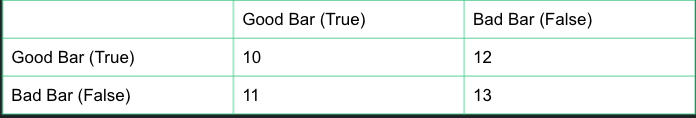

In [15]:
from IPython.display import Image
Image("robin_matrix.png")

#### Coding Solution In The Following Notebook: 

http://localhost:8888/notebooks/Algos%20In%2010%20Season%202%20Episode%208%20Teen%20Titans%20Clustering%20Notebook%201.ipynb

## Teen Titans Problem Part B: Cyborg (Nice little mainframe twist)

Slade has put Cyborg in the ‘wrong floor’, and Cyborg is a smart CS / DS / engineering guy. However, Cyborg isn’t good with directions finding. Luckily, he does have some mainframe knowledge about dataset allocations. 

Slade has allocated the following datasets: Consider the dataset bit as a point in the K-Means clustering algorithm:

	SLADE.TRICK.EAST = 20 bits 
	SLADE.TRICK.WEST= 40 bits 
	SLADE.TRICK.NORTH = 10 bits 
	SLADE.TRICK.SOUTH = 30 bits 

Given now four directions (North, East, West, South), use the K-Means algorithm to help Cyborg escape the Maze of Doom, where he will not be able to stay awake (Slade has put some sort of sleeping agent in the maze) unless he is 2 times the recommended distance from the starting point. 






#### Coding Solution In The Following Notebook: 

http://localhost:8888/notebooks/Algos%20In%2010%20Season%202%20Episode%208%20Teen%20Titans%20Clustering%20Notebook%202.ipynb

## Teen Titans Problem Part C: Starfire (GMM Pizza Conundrum)

For the ladies, Slade is going more down the dinner date route. 

Starfire is a pizza fanatic. As attributed by the Teen Titans Go Movie, she simply loves all things pizza. Unfortunately, Slade is as clever in Algos as he is in Mind Control Manipulation.

Slade tries to give Starfire some sort of stomach pain by ‘falsely’ giving her instructions to make the famous Titans Pizza. Use GMM (Gaussian Mixture Models) clustering solution to help her avoid facing that particular pain, where each cluster is of the following 3 ingredients: pepperoni, cheese, and pineapple. 




#### Coding Solution In The Following Notebook: 

http://localhost:8888/notebooks/Algos%20In%2010%20Season%202%20Episode%208%20Teen%20Titans%20Clustering%20Notebook%203.ipynb

## Teen Titans Problem Part D: Raven (Shady Centroids)


As for Raven, Slade is trying to put reverse psychology to ‘trick’ her. 

Raven is suddenly waking up at Teen Titans HQ, and she is stuck in a circular room with 5 doors. Only one of them is the proper exit, the other is a room full of lasers, trap doors, and other dangerous things. 

Apply a centroid clustering algorithm to help Raven escape. 

Hint: See the Iris flower dataset clustering solution: 

https://www.kaggle.com/khotijahs1/k-means-clustering-of-iris-dataset

#### Coding Solution In The Following Notebook: 

http://localhost:8888/notebooks/Algos%20In%2010%20Season%202%20Episode%208%20Teen%20Titans%20Clustering%20Notebook%204.ipynb

## Teen Titans Problem Part E: Beast Boy (ft. Mr Beast)


Slade finally puts Beast Boy into ‘idol’ trance, by having the famous YouTuber Mr. Beast (S/O to his work on YouTube!) as a ‘fake’ guide for him in a zoo. 

Since Beast Boy can turn into an animal at will of his choosing, Slade will use biological and zoological confusion to his advantage. Use a dendrogram-based clustering solution and provide a heat map (for now, since this is non-coding, we will just draw a crude dummy heat map, and for S2 E8, use seaborn and histogram plotting to properly draw it with Python) to help Beast Boy escape the zoo with his ‘most durable’ animal form of: dinosaur, gorilla, dog, cat, and falcon. 

Essentially, run a 5-cluster node solution with a dendrogram and heat map to figure out the problem. 




#### Coding Solution In The Following Notebook: 

 http://localhost:8888/notebooks/Algos%20In%2010%20Season%202%20Episode%208%20Teen%20Titans%20Clustering%20Notebook%205.ipynb